In [1]:
#!pip install vaderSentiment
#!pip install wordcloud
#!pip install -U gensim
#!pip install xgboost
#!pip install plotly
#!pip install textblob
#!pip install seaborn
#!pip install langdetect 
#!pip install google_trans_new
import time
t0 = time.time()
import pandas as pd
import numpy as np
import re
import string
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from pprint import pprint

# nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import seaborn as sns

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import ensemble
import xgboost, string 
import csv,nltk
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from nltk.corpus import webtext
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from gensim.parsing.preprocessing import strip_punctuation, strip_tags, strip_numeric
from nltk.stem.wordnet import WordNetLemmatizer   
from nltk.corpus import stopwords
import string
import seaborn as sns
import calendar

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from langdetect import detect
from google_trans_new import google_translator 

t1 = time.time()
print("Time taken to load/import libraries ", round(t1-t0,3))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Time taken to load/import libraries  3.42


# Business Understanding

- <h2>Preparedness for the forthcoming automobile product business opportunity</h2>

# Business Objective

- <h2>Find the future trends and maximize the revenue</h2>

# Github Link

<h3> Please refer to the below Github link for entire code reference</h3>

[Github Link](https://github.com/Bhargavi-6/group1_fp1_final_project.git)

# Reading/Loading Extracted Data

<h3>The following are the list of car products that are extracted from amazon</h3>

- <h4>Car Wheel</h4>
- <h4>Car Engineoil</h4>
- <h4>Car Fog Lamp</h4>
- <h4>Car Seat Covers</h4>
- <h4>Car Tyre</h4>
- <h4>Car Windshield Washer</h4>
- <h4>Car Wiper</h4>

## Reading Car Wheels Data

In [2]:
carwheel_df = pd.read_csv("amazon_carwheel.csv")
carwheel_df.head(3)

,product_name,product_link,review_date,review_title,review_rating,review_comment
0,TRD Tyre Stickers for Car - Tyre Tattoo,https://www.amazon.in/Tattoo-Premium-Unique-St...,Reviewed in India on 25 December 2021,\nBest product from best people and the only g...,5.0 out of 5 stars,\nIt's perfect and very beautiful and my 2nd p...
1,Tyre Tattoo 3D Premium & Unique Rubber Tyre St...,https://www.amazon.in/Tattoo-Premium-Stickers-...,Reviewed in India on 10 September 2021,\n100/100\n,5.0 out of 5 stars,\n\n\n\n\n The media could ...
2,Tyre Tattoo 3D Premium & Unique Rubber Tyre St...,https://www.amazon.in/Tattoo-Premium-Stickers-...,Reviewed in India on 16 December 2021,\nLooks aesthetically & technically sound\n,5.0 out of 5 stars,\nPurchased from open market- Quality & design...


## Reading Engine Oil Data

In [3]:
carengineoil_df = pd.read_csv("amazon_carengineoil.csv")
carengineoil_df.head(3)

,product_name,product_link,review_date,review_title,review_rating,review_comment
0,Mobil 1 Super 3000 Formula 5W-40 Fully Synthet...,https://www.amazon.in/Mobil-Super-Formula-Synt...,8 January 2019,good original mobil1 oil my petrol car engine ...,4,good oil from mobil1 used first time in my pet...
1,Mobil 1 Super 3000 Formula 5W-40 Fully Synthet...,https://www.amazon.in/Mobil-Super-Formula-Synt...,25 January 2020,true to its performance,5,tried the full synthetic engine oil for the fi...
2,Mobil 1 Super 3000 Formula 5W-40 Fully Synthet...,https://www.amazon.in/Mobil-Super-Formula-Synt...,18 September 2020,best engine oil,5,thankyou amazon this is the best value for mon...


## Reading Car Fog Lamp Data

In [4]:
carfoglamp_df = pd.read_csv("amazon_carfoglamp.csv")
carfoglamp_df.head(3)

,product_name,product_link,review_date,review_title,review_rating,review_comment
0,FABTEC Car LED Focus High Power LED Bar Light ...,https://www.amazon.in/FABTEC-Focus-Light-Flood...,Reviewed in India on 28 September 2021,\nGreat product\n,3.0 out of 5 stars,\n\n\n\n\n The media could ...
1,FABTEC Car LED Focus High Power LED Bar Light ...,https://www.amazon.in/FABTEC-Focus-Light-Flood...,Reviewed in India on 10 December 2021,"\nIf your car is old, so you can definitely us...",5.0 out of 5 stars,\n\n\n\n\n The media could ...
2,FABTEC Car LED Focus High Power LED Bar Light ...,https://www.amazon.in/FABTEC-Focus-Light-Flood...,Reviewed in India on 21 July 2020,\nOverall brightness is good. Centre light is ...,4.0 out of 5 stars,\n\n\n\n\n The media could ...


## Reading Car Seat Cover Data

In [5]:
carseatcover_df = pd.read_csv("amazon_carseatcover.csv")
carseatcover_df.head(3)

,product_name,product_link,review_date,review_title,review_rating,review_comment
0,"ROGER Cushport Synthetic Leather, Multi Suppor...",https://www.amazon.in/Roger-Cushport-Universal...,Reviewed in India on 19 July 2022,\nLoved it\n,5.0 out of 5 stars,\nI purchased two for my Mahindra Bolero 2020 ...
1,"ROGER Cushport Synthetic Leather, Multi Suppor...",https://www.amazon.in/Roger-Cushport-Universal...,Reviewed in India on 6 August 2022,\nDoes not fit Honda Brio\n,1.0 out of 5 stars,\nProduct was said to be a universal fit. It w...
2,"ROGER Cushport Synthetic Leather, Multi Suppor...",https://www.amazon.in/Roger-Cushport-Universal...,Reviewed in India on 27 July 2022,\nGood quality\n,5.0 out of 5 stars,\nGood material and very comfortable pussing a...


## Reading Car Tyre Data

In [6]:
cartyre_df = pd.read_csv("amazon_cartyre.csv")
cartyre_df.head(3)

,product_name,product_link,review_date,review_title,review_rating,review_comment
0,JK Tyre 165/80 R14 Taximax Tubeless Car Tyre,https://www.amazon.in/Tyres-Taxi-Max-Tubeless-...,Reviewed in India on 15 September 2020,\nGood tyres\n,5.0 out of 5 stars,\nSo far so goodWarranty of 5yearsHopefully th...
1,JK Tyre 165/80 R14 Taximax Tubeless Car Tyre,https://www.amazon.in/Tyres-Taxi-Max-Tubeless-...,Reviewed in India on 30 June 2022,\nThe best tyre that you can get at the entry ...,5.0 out of 5 stars,"\nI used the same model tyre - JK Taximax, for..."
2,JK Tyre 165/80 R14 Taximax Tubeless Car Tyre,https://www.amazon.in/Tyres-Taxi-Max-Tubeless-...,Reviewed in India on 26 November 2020,\nTyree are good\n,5.0 out of 5 stars,\nAs on now it is ok\n


## Reading Car Windshield Washer Data

In [7]:
carwindshwash_df = pd.read_csv("amazon_carwindshwash.csv")
carwindshwash_df.head(3)

,product_name,product_link,review_date,review_title,review_rating,review_comment
0,LAZI (10 Tablets) Multipurpose car windshield ...,https://www.amazon.in/LAZI-Tablets-windshield-...,Reviewed in India on 28 June 2022,\nBetter than soapwater\n,4.0 out of 5 stars,\nYou kinda get addicted to wiping your window...
1,LAZI (10 Tablets) Multipurpose car windshield ...,https://www.amazon.in/LAZI-Tablets-windshield-...,Reviewed in India on 16 July 2022,\nNot effective\n,1.0 out of 5 stars,\nNo effectivness\n
2,LAZI (10 Tablets) Multipurpose car windshield ...,https://www.amazon.in/LAZI-Tablets-windshield-...,Reviewed in India on 24 June 2022,\nGood product\n,5.0 out of 5 stars,\nGood product\n


## Reading Car Wiper Data

In [8]:
carwiper_df = pd.read_csv("amazon_carwiper.csv")
carwiper_df.head(3)

,product_name,product_link,review_date,review_title,review_rating,review_comment
0,Woschmann-Car Replacement Wiper Blade Assembly...,https://www.amazon.in/Woschmann-Car-Replacemen...,Reviewed in India on 21 May 2022,\nNot suitable for Honda Civic 8th Gen. and no...,1.0 out of 5 stars,\nIt is not suitable for Honda Civic 8th Gen. ...
1,Woschmann-Car Replacement Wiper Blade Assembly...,https://www.amazon.in/Woschmann-Car-Replacemen...,Reviewed in India on 29 July 2022,"\nProduct shown is different, received totally...",1.0 out of 5 stars,"\nCrazy seller, Amazon should ban these kind o..."
2,Woschmann-Car Replacement Wiper Blade Assembly...,https://www.amazon.in/Woschmann-Car-Replacemen...,Reviewed in India on 27 May 2022,\nGood product\n,5.0 out of 5 stars,\nQuality good\n


## Examine all the loaded datasets

In [9]:
print("Shape of Car Wheel ", carwheel_df.shape)
print("Shape of Car Engineoil ", carengineoil_df.shape)
print("Shape of Car Fog Lamp ", carfoglamp_df.shape)
print("Shape of Car Seat Covers ", carseatcover_df.shape)
print("Shape of Car Tyre ", cartyre_df.shape)
print("Shape of Car Windshield Washer ", carwindshwash_df.shape)
print("Shape of Car Wiper ", carwiper_df.shape)

Shape of Car Wheel  (130, 6)
Shape of Car Engineoil  (206, 6)
Shape of Car Fog Lamp  (495, 6)
Shape of Car Seat Covers  (219, 6)
Shape of Car Tyre  (594, 6)
Shape of Car Windshield Washer  (216, 6)
Shape of Car Wiper  (637, 6)


### Add Product column to the dataset

In [10]:
loc = 0
carwheel_df.insert(loc,'Product', 'Car Wheel')
carengineoil_df.insert(loc,'Product', 'Car Engine Oil')
carfoglamp_df.insert(loc,'Product', 'Car Fog Lamp')
carseatcover_df.insert(loc,'Product', 'Car Seat Covers')
cartyre_df.insert(loc,'Product', 'Car Tyre')
carwindshwash_df.insert(loc,'Product', 'Car Windshield Washer')
carwiper_df.insert(loc,'Product', 'Car Wiper')

### Combine All Datasets

In [11]:
car_amazon_df = pd.concat([carwheel_df, carengineoil_df, carfoglamp_df, carseatcover_df, cartyre_df, carwindshwash_df, carwiper_df])
print("Shape of All Car Products ", car_amazon_df.shape)

Shape of All Car Products  (2497, 7)


### Display Data Types and Columns

In [12]:
car_amazon_df.dtypes

Product           object
product_name      object
product_link      object
review_date       object
review_title      object
review_rating     object
review_comment    object
dtype: object

In [13]:
car_amazon_df.columns

Index(['Product', 'product_name', 'product_link', 'review_date',
       'review_title', 'review_rating', 'review_comment'],
      dtype='object')

# Describe The Overall Data

In [14]:
car_amazon_df.describe()

,Product,product_name,product_link,review_date,review_title,review_rating,review_comment
count,2497,2497,2497,2497,2497,2497,2472
unique,7,227,229,983,1386,10,1565
top,Car Wiper,"MICHELIN 16"" Traditional Rainforce wiper Blades",https://www.amazon.in/TYRE-Ultima-Tubeless-Tyr...,Reviewed in India on 6 July 2022,\nGood\n,5.0 out of 5 stars,\nGood\n
freq,637,40,40,16,69,986,38


# Pre-processing

<h2>The following steps are done as part of the preprocessing or data cleaning part.</h2>

- <h3>Removed columns</h3> 
- <h3>Removed non-ASCII, Unicode, Whitespaces, HTML Tags, Special characters</h3>
- <h3>Trimed Review Comments and Review Title Columns data</h3>
- <h3>Detected Language and translated non-English text to English</h3>
- <h3>Removed some unneccessary text like "the media could not be loaded" etc. from comments</h3>
- <h3>Changed rating column from text to numerical for better understanding like '5.0 out of 5 stars' to '5'</h3>
- <h3>Formated date column</h3>
- <h3> Pre filling the empty review comment columns with review title column data </h3>

<h3>For each of the above steps written methods/functions. Applied each cleanup functions to all the datasets in the dictionary.<h3>

In [15]:
def clean_string(text):
    text= re.sub('\W+'," ", text)
    text= re.sub("(\xe9|\362)", "", text)
    text= re.sub("(<U\\+\\w+>)", "", text)
    text= re.sub("[^a-zA-Z0-9]"," ",text)
    text= text.lower()
    text= re.sub(' +', " ", text)
    text= re.sub('the media could not be loaded',"",text)
    text = text.lstrip(' ')   
    return text

def remove_special_characters(dataCol):
    r = re.compile(r'[^a-zA-Z !@#$%&*_+-=|\:";<>,./()[\]{}\']')
    return r.sub('', dataCol)
def remove_html_junk(dataCol):
    text = BeautifulSoup(dataCol, 'html.parser').getText()
    return text
def trim_string(dataCol):
    return dataCol.strip()
def obs_pattern(dataCol):
    r = re.compile(r'^[\s!\s]+$')
    return r.sub('', dataCol)
def detect_lang(text):   
    result_lang = ''
    if(text):
        result_lang = detect(text)    
    return result_lang
def detect_and_translate(text):  
    translate_text = text
    result_lang = ''
    if(text):
        result_lang = detect(text)    
        if result_lang == 'en' or result_lang == '':
            return translate_text    
        else:
            try:            
                translator = google_translator()
                translate_text = translator.translate(text,lang_src=result_lang,lang_tgt='en')
                return translate_text 
            except:
                pass
    return translate_text

def rating(dataCol):
    if type(dataCol) == str:
        dataCol = dataCol.split(".", 1)[0]
    return dataCol
    
# Preprocessor method which will apply all clenup functions on the datacolumns
def preprocessor(dataCol):
    if dataCol is not None:    
        dataCol = clean_string(dataCol)
        dataCol = remove_special_characters(dataCol)
        dataCol = remove_html_junk(dataCol)
        dataCol = trim_string(dataCol)
        dataCol = obs_pattern(dataCol)       
        #dataCol = detect_and_translate(dataCol)
    return dataCol

car_amazon_df['product_name'] = car_amazon_df['product_name'].astype('str')
car_amazon_df['review_comment'] = car_amazon_df['review_comment'].astype('str')
car_amazon_df['review_title'] = car_amazon_df['review_title'].astype('str')

car_amazon_df['review_comment'] = car_amazon_df['review_comment'].apply(preprocessor)
car_amazon_df['product_name'] = car_amazon_df['product_name'].apply(preprocessor)
car_amazon_df['review_title'] = car_amazon_df['review_title'].apply(preprocessor) 
car_amazon_df['review_rating'] = car_amazon_df['review_rating'].apply(rating)
car_amazon_df['review_date'] = car_amazon_df['review_date'].replace('Reviewed in India on','', regex=True)
car_amazon_df['review_date'] = car_amazon_df['review_date'].apply(preprocessor)
car_amazon_df['review_date'] = pd.to_datetime(car_amazon_df['review_date'], format='%d %B %Y')
car_amazon_df['year'] = pd.DatetimeIndex(car_amazon_df['review_date']).year
car_amazon_df['month'] = pd.DatetimeIndex(car_amazon_df['review_date']).month


# Replacing empty columns of review comments column with review titles
#nulls_index = car_amazon_df['review_comment'].isnull()

    
#car_amazon_df.review_comment.fillna(car_amazon_df.review_title, inplace=True)
#car_amazon_df['review_comment'] = car_amazon_df['review_comment'].fillna(method ='bfill')
#car_amazon_df['review_comment'] = car_amazon_df['review_comment'].replace(np.NaN,car_amazon_df['review_title'], regex=True)
#car_amazon_df['review_comment'] = car_amazon_df['review_comment'].isnull(car_amazon_df['review_title'])

car_amazon_df.to_csv('amazon_car.csv', index=False)

# Basic Text Analysis

<h2>Performed basic text analysis by following below steps in sequence on Review text inorder to do further analysis.</h2>

<ol>
    <li><h3>Performed Tokenization with Stemming</h3></li>
        <ol>
            <li><h4>Tokenize sentence into words</h4></li>
            <li><h4>Consider only Alphanumeric words and exclude other's like numeric etc.</h4></li>
            <li><h4>Remove stopwords</h4></li>
            <li><h4>Get stemming of records</h4></li>
    </ol>
    <li><h3>Parts Of Speech</h3></li>
    <li><h3>Lemmatization</h3></li>
</ol>

In [16]:
# Loading stopwords from nltk
# stopwords = nltk.corpus.stopwords.words("english")
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['car','oil','product', 'wiper','windshield','amazon','buy','time','even','work','tyre','away', 'every','certain','finally','got','get', 'im','even','cant', 'would',
                  'said', 'could', 'wanted', 'needed', 'end', 'taking', 'dude','gotten', 'since', 'le', 'thus',
                  'tx', 'whatever', 'therefore','ever', 'pa', 'wasnt','still', 'gave','yall','something', 'theyre',
                  'dont', 'need',  'wont', 'doesnt',  'nothing', 'ive','saying','u','please'])

# This function will perform tokenization
def tokenize_only(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if(not token in stop_words):            
            if re.search('[a-zA-Z]',token):
                filtered_tokens.append(token)
    return filtered_tokens

# This function will perform tokenization and stemming
stemmer = SnowballStemmer("english")
def tokenize_and_stem(text):    
    filtered_tokens = tokenize_only(text)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

# This function perform tokenization, stemming and parts of speech
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(tokenize_and_stem(text))
    newlist = []
    for word, tag in tags:
        newlist.append(tuple([word, pos_dict.get(tag[0])]))           
    return newlist

# This function perform lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

### Defined Function for Basic Text Analysis - Tokenization, Stemming, Parts Of Speech and Lemmatization

In [17]:
def apply_basic_text_analysis(dataCol):        
    dataCol = token_stop_pos(dataCol)    
    dataCol = lemmatize(dataCol)    
    return dataCol    

## Apply basic text analysis on Review Comment column by looping all product datasets

In [18]:
car_amazon_df['Lemma'] = car_amazon_df['review_comment'].apply(apply_basic_text_analysis)

# Sentiment Analysis with VADER

- <h3>Applied 'Vader Sentiment Analysis' on the review comments and derived positive, negative, neutral and compound values.</h3>
- <h3>Sentiment analysis done based on the valence score of the review text.</h3>
- <h3>Created new column 'Vader Sentiment' apply on Lemma Column.</h3>
- <h3>Get count of positive, negative, neutral records for each product.</h3>
- <h3>Ploted them in the bar chart.</h3>

In [19]:
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

def vader_analysis(compound):
    if compound > 0:
        return 'Positive'
    elif compound == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [20]:
car_amazon_df['Vader Sentiment'] = car_amazon_df['Lemma'].apply(vadersentimentanalysis)
car_amazon_df['Vader Analysis'] = car_amazon_df['Vader Sentiment'].apply(vader_analysis)   
sentiment_analysis = car_amazon_df.groupby(['Product','Vader Analysis']).size().reset_index(name='counts')
sentiment_analysis

,Product,Vader Analysis,counts
0,Car Engine Oil,Negative,33
1,Car Engine Oil,Neutral,38
2,Car Engine Oil,Positive,135
3,Car Fog Lamp,Negative,62
4,Car Fog Lamp,Neutral,106
5,Car Fog Lamp,Positive,327
6,Car Seat Covers,Negative,21
7,Car Seat Covers,Neutral,40
8,Car Seat Covers,Positive,158
9,Car Tyre,Negative,63


# Sentimental Analysis on Each Product

## Summary of 'Car Engine Oil'

In [21]:
car_engine_oil_sa_df = sentiment_analysis.loc[(sentiment_analysis['Product'] == 'Car Engine Oil')]
eo_df = pd.DataFrame(car_engine_oil_sa_df.T.values[2:], columns= ['Negative', 'Neutral', 'Positive'])
eo_df.insert(0,'Product', 'Car Engine Oil')
eo_df

,Product,Negative,Neutral,Positive
0,Car Engine Oil,33,38,135


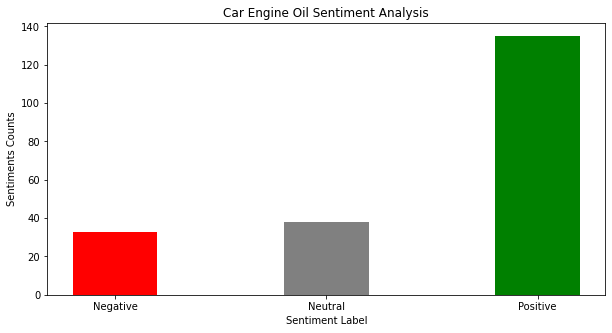

In [22]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5))    
plt.bar(car_engine_oil_sa_df['Vader Analysis'], car_engine_oil_sa_df['counts'], color=['red','gray','green'], width = 0.4) 
plt.xlabel("Sentiment Label")
plt.ylabel("Sentiments Counts")
plt.title("Car Engine Oil Sentiment Analysis")
plt.show()

## Summary of 'Car Wheel'

In [23]:
car_wheel_sa_df = sentiment_analysis.loc[(sentiment_analysis['Product'] == 'Car Wheel')]
w_df = pd.DataFrame(car_wheel_sa_df.T.values[2:], columns= ['Negative', 'Neutral', 'Positive'])
w_df.insert(0,'Product', 'Car Wheel')
w_df

,Product,Negative,Neutral,Positive
0,Car Wheel,22,20,88


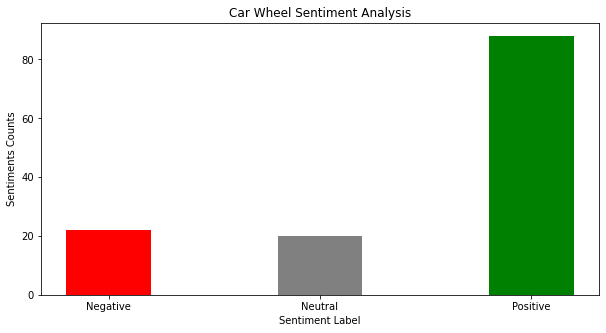

In [24]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5))    
plt.bar(car_wheel_sa_df['Vader Analysis'], car_wheel_sa_df['counts'], color=['red','gray','green'], width = 0.4) 
plt.xlabel("Sentiment Label")
plt.ylabel("Sentiments Counts")
plt.title("Car Wheel Sentiment Analysis")
plt.show()

## Summary of 'Car Fog Lamp'

In [25]:
car_fog_lamp_sa_df = sentiment_analysis.loc[(sentiment_analysis['Product'] == 'Car Fog Lamp')]
fl_df = pd.DataFrame(car_fog_lamp_sa_df.T.values[2:], columns= ['Negative', 'Neutral', 'Positive'])
fl_df.insert(0,'Product', 'Car Fog Lamp')
fl_df

,Product,Negative,Neutral,Positive
0,Car Fog Lamp,62,106,327


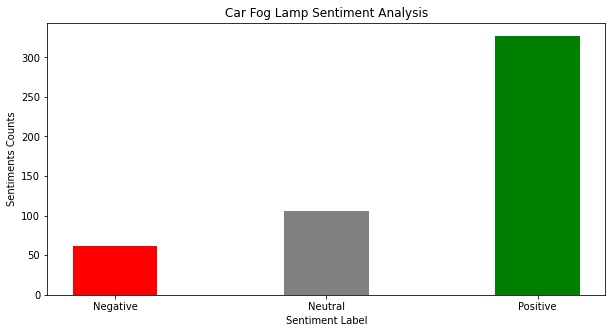

In [26]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5))    
plt.bar(car_fog_lamp_sa_df['Vader Analysis'], car_fog_lamp_sa_df['counts'], color=['red','gray','green'], width = 0.4) 
plt.xlabel("Sentiment Label")
plt.ylabel("Sentiments Counts")
plt.title("Car Fog Lamp Sentiment Analysis")
plt.show()

## Summary of 'Car Seat Covers'

In [27]:
car_seat_covers_sa_df = sentiment_analysis.loc[(sentiment_analysis['Product'] == 'Car Seat Covers')]
sc_df = pd.DataFrame(car_seat_covers_sa_df.T.values[2:], columns= ['Negative', 'Neutral', 'Positive'])
sc_df.insert(0,'Product', 'Car Seat Covers')
sc_df

,Product,Negative,Neutral,Positive
0,Car Seat Covers,21,40,158


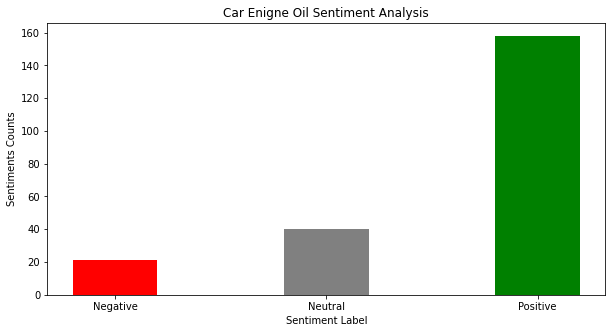

In [28]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5))    
plt.bar(car_seat_covers_sa_df['Vader Analysis'], car_seat_covers_sa_df['counts'], color=['red','gray','green'], width = 0.4) 
plt.xlabel("Sentiment Label")
plt.ylabel("Sentiments Counts")
plt.title("Car Enigne Oil Sentiment Analysis")
plt.show()

## Summary of 'Car Tyre'

In [29]:
car_tyre_sa_df = sentiment_analysis.loc[(sentiment_analysis['Product'] == 'Car Tyre')]
t_df = pd.DataFrame(car_tyre_sa_df.T.values[2:], columns= ['Negative', 'Neutral', 'Positive'])
t_df.insert(0,'Product', 'Car Tyre')
t_df

,Product,Negative,Neutral,Positive
0,Car Tyre,63,119,412


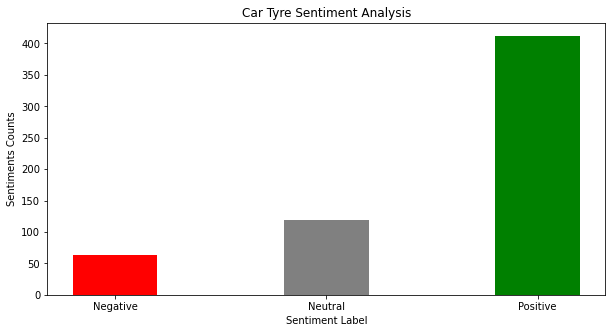

In [30]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5))    
plt.bar(car_tyre_sa_df['Vader Analysis'], car_tyre_sa_df['counts'], color=['red','gray','green'], width = 0.4) 
plt.xlabel("Sentiment Label")
plt.ylabel("Sentiments Counts")
plt.title("Car Tyre Sentiment Analysis")
plt.show()

## Summary of 'Car Windshield Washer'

In [31]:
car_windshielwasher_sa_df = sentiment_analysis.loc[(sentiment_analysis['Product'] == 'Car Windshield Washer')]
wsw_df = pd.DataFrame(car_windshielwasher_sa_df.T.values[2:], columns= ['Negative', 'Neutral', 'Positive'])
wsw_df.insert(0,'Product', 'Car Windshield Washer')
wsw_df

,Product,Negative,Neutral,Positive
0,Car Windshield Washer,24,36,156


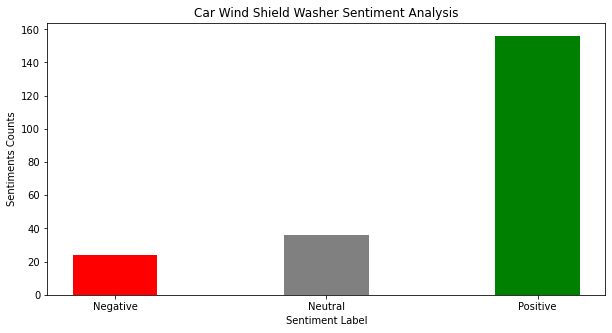

In [32]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5))    
plt.bar(car_windshielwasher_sa_df['Vader Analysis'], car_windshielwasher_sa_df['counts'], color=['red','gray','green'], width = 0.4) 
plt.xlabel("Sentiment Label")
plt.ylabel("Sentiments Counts")
plt.title("Car Wind Shield Washer Sentiment Analysis")
plt.show()

## Summary of 'Car Wiper'

In [33]:
car_wiper_sa_df = sentiment_analysis.loc[(sentiment_analysis['Product'] == 'Car Wiper')]
wiper_df = pd.DataFrame(car_wiper_sa_df.T.values[2:], columns= ['Negative', 'Neutral', 'Positive'])
wiper_df.insert(0,'Product', 'Car Wiper')
wiper_df

,Product,Negative,Neutral,Positive
0,Car Wiper,91,78,468


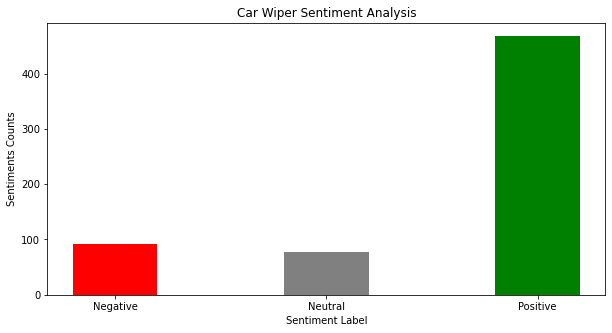

In [34]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5))    
plt.bar(car_wiper_sa_df['Vader Analysis'], car_wiper_sa_df['counts'], color=['red','gray','green'], width = 0.4) 
plt.xlabel("Sentiment Label")
plt.ylabel("Sentiments Counts")
plt.title("Car Wiper Sentiment Analysis")
plt.show()

# Feature construction and extraction

## Construct DTM

- <b>Build a panda DF, index as stemmed vocabulary and column as tokenized words
- <b>Build DTM under TFIDF scheme

- <b>1. Build/Construct vectorizer by providing Lemmatized Text, n value to calculate Ngram 
- <b>2. Transform vectorizer to get BOW, feature names
- <b>3. Construct dataframe of bag of words
- <b>4. Build TFIDF matrix from bag of words
- <b>5. Get Words of highest weights
- <b>6. Build dataframe with word,count,weight
- <b>7. Get Cosine similarity
- <b>8. Get the Distance matrix

In [35]:
def buildVector(text,ngram):
    cvector = CountVectorizer(max_df=1.0,  min_df=0.0, vocabulary=None, ngram_range=(1,ngram))
    cvectorfit = cvector.fit(text)
    
    bag_of_words = cvectorfit.transform(text)
    feature_names = cvectorfit.get_feature_names_out()
    bag_of_words_df = pd.DataFrame(bag_of_words.todense(), columns=feature_names)
    
    tfidftransformer = TfidfTransformer()
    tfidf = tfidftransformer.fit_transform(bag_of_words)
    
    word_cnts = np.asarray(bag_of_words.sum(axis=0)).ravel().tolist()
    df_cnts = pd.DataFrame({'word': feature_names, 'count': word_cnts})
    df_cnts = df_cnts.sort_values('count', ascending=False)
    weights = np.asarray(tfidf.mean(axis=0)).ravel().tolist()
    df_weights = pd.DataFrame({'word': feature_names, 'weight': weights})
    df_weights = df_weights.sort_values('weight', ascending=False)

    df_weights = df_weights.merge(df_cnts, on='word', how='left')
    df_weights = df_weights[['word', 'count', 'weight']]

    cos_sim = cosine_similarity(tfidf, tfidf)
    samp_dist = 1 - cos_sim
    
    return cvectorfit, feature_names, bag_of_words_df, tfidf, df_weights, cos_sim, samp_dist

In [36]:
cvec, feature_names, bag_of_words_df, tfidf, df_weights, cos_sim, samp_dist = buildVector(car_amazon_df['Lemma'],2)
df_tfidf = pd.DataFrame(tfidf.todense(), columns=feature_names)

In [37]:
print("Features:")
feature_names[:10]

Features:


array(['000km', '000km go', '000km odo', '000kms', '000kms gearbox', '0w',
       '0w engin', '0w20', '0w20 suggest', '0w30'], dtype=object)

In [38]:
print("Weights:")
df_weights.head(5)

Weights:


,word,count,weight
0,good,1066,0.072372
1,qualiti,503,0.021476
2,nice,142,0.018331
3,use,684,0.017791
4,money,223,0.013999


In [39]:
sentences = car_amazon_df['Lemma'].values.tolist()
print("cos_sim[%d,%d] (a square matrix of length and width ) " % (len(sentences), len(sentences)))
df = pd.DataFrame(np.array(cos_sim))
df.head(3)

cos_sim[2497,2497] (a square matrix of length and width ) 


,0,1,2,3,4,5,6,7,8,9,...,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496
0,1.000000,0.0,0.021018,0.020996,0.000000,0.0,0.00000,0.070301,0.0,0.0,...,0.000000,0.012595,0.00000,0.000000,0.032065,0.011641,0.000000,0.007754,0.013941,0.024825
1,0.000000,1.0,0.000000,0.000000,0.009365,0.0,0.00000,0.000000,0.0,0.0,...,0.025386,0.000000,0.00000,0.014213,0.011129,0.000000,0.000000,0.008544,0.000000,0.000000
2,0.021018,0.0,1.000000,0.059484,0.014516,0.0,0.01425,0.026982,0.0,0.0,...,0.000000,0.025134,0.02751,0.003577,0.025184,0.000000,0.006279,0.016202,0.019914,0.006352


In [40]:
print("df_bag_of_words[%d,%d]:" % (len(sentences), len(feature_names)))
bag_of_words_df.head(3)

df_bag_of_words[2497,22549]:


,000km,000km go,000km odo,000kms,000kms gearbox,0w,0w engin,0w20,0w20 suggest,0w30,...,zire,zire cheap,zone,zone return,zvx,zx,zx break,zxi,zxi easi,zxi improv
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
s_word_freq = pd.Series(df_weights['count'])
s_word_freq.index = df_weights['word']
di_word_freq = s_word_freq.to_dict()

### Wordclouds

In [42]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'white').generate_from_frequencies(text)
    fig = plt.figure(
        figsize = (15, 8),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

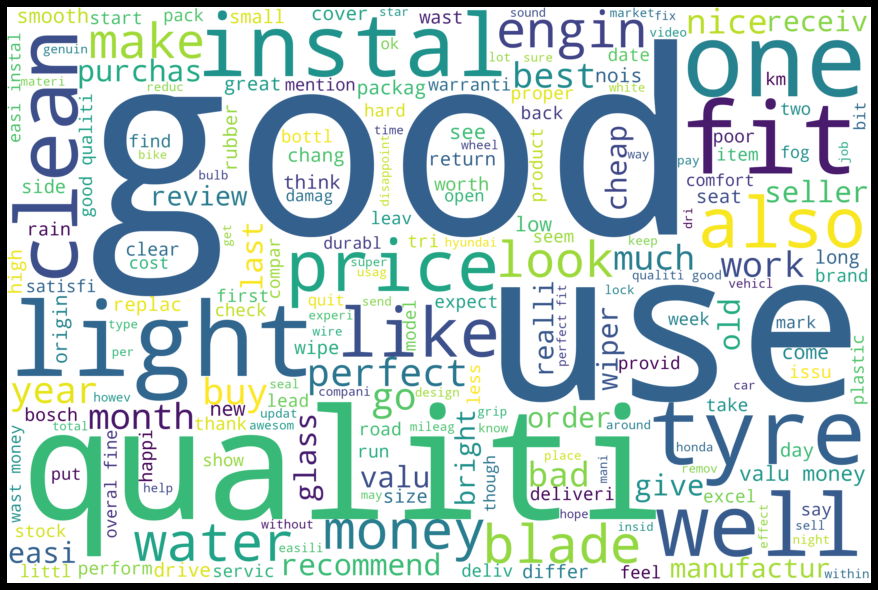

In [43]:
generate_word_cloud(di_word_freq)

#### Word Cloud Analysis

The most prominent features we can identify are:

1. good
2. price
3. light
4. instal
5. look

Since, 90% of the ratings are postive

###### From the above list, we can say good reviews came for the products tyre,wiper,windshield etc.

In Gensim model, we are trying to explore as many features as the model can identify using coherence values and perplexity fitb

#### Step 1: Text cleaning and Tokenisation

Clean the text and then remove any additional stop words
NLTK extended Stop words list
Below we are removing common words that do not provide latent feature specific words. 
Words like uber, driver, couldnt, taking, dude, something etc

### Please note that we are running Gensim Model and Text Classification for Reviews of all products

We want to identify the features that are contributing to all product Ratings

In [44]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['car','oil','product', 'wiper','windshield','amazon','buy','time','even','work','tyre','away', 'every','certain','finally','got','get', 'im','even','cant', 'would',
                  'said', 'could', 'wanted', 'needed', 'end', 'taking', 'dude','gotten', 'since', 'le', 'thus',
                  'tx', 'whatever', 'therefore','ever', 'pa', 'wasnt','still', 'gave','yall','something', 'theyre',
                  'dont', 'need',  'wont', 'doesnt',  'nothing', 'ive','saying','u','please'])

In [45]:
lemma = WordNetLemmatizer()
def textClean(text0):
    text1 = [strip_punctuation(doc) for doc in text0]
    text1 = [strip_tags(doc) for doc in text1]
    text1 = [strip_numeric(doc) for doc in text1]
    text1 = [[" ".join([i for i in doc.lower().split() if i not in stop_words])] for doc in text1]
    text2 = [[word for word in ' '.join(doc).split()] for doc in text1]
    normalized = [[" ".join([lemma.lemmatize(word) for word in ' '.join(doc).split()])] for doc in text2]
    return normalized

corpus1 = textClean(car_amazon_df['Lemma'])

#### Step 2: Creating corpus for Topic Modelling

Gensim supports building of dictionary object which we are applying on n-gram we have built.

After, creating the dictionary, we are creating the TF or term frequency count based on DTM 

We have kept the min_count and threshold of these values on a bit higher side to get better bigrams from the Reviews as the reviews are quite descriptive

In [46]:
## DTM building etc via gensim
corpus2 = [[word for word in ' '.join(doc).split()] for doc in corpus1]  # word_tokenize first

# Building the bigram and trigram models
bigram = gensim.models.Phrases(corpus2, min_count=2, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[corpus2], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# print(trigram_mod[bigram_mod[corpus2[0]]])  # See trigram example

id2word = corpora.Dictionary(corpus2)  # Create Dictionary
corpus = [id2word.doc2bow(text) for text in corpus2]  # Building gensim corpus. TF DTM creation.
print(corpus[:1])  # View one doc in abstract form

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]]


In [47]:
# Human readable format of corpus (term-frequency)
a0 = [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
[x for (x, y) in a0[0] if y >4]

[]

#### Step 3: Building the Topic Model

we have given the number of topics as 4 to extract latent topics

In [48]:
# Build LDA model for (say) K=4 topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

#### Step 4: Obtain Factor Matrices

We obtain two factor Matrices from Gensim data
1. beta - maps tokens to topics
2. gamma - maps docs to topics

In [49]:
## def func for beta_df
import pandas as pd

## obtain the factor matrices - beta
def build_beta_df(lda_model=lda_model, id2word=id2word):
    beta = lda_model.get_topics()  # shape (num_topics, vocabulary_size).
    beta_df = pd.DataFrame(data=beta)

    # convert colnames in beta_df 2 tokens
    token2col = list(id2word.token2id)
    beta_df.columns = token2col
    # beta_df.loc[0,:].sum()  # checking if rows sum to 1

    # convert rownames too, eh? Using format(), .shape[] and range()
    rowNames=['topic' + format(x+1, '02d') for x in range(beta_df.shape[0])]
    rowNames_series = pd.Series(rowNames)
    beta_df.rename(index=rowNames_series, inplace=True)
    return(beta_df)

# invoke func
beta_df = build_beta_df(lda_model=lda_model, id2word=id2word)
beta_df.iloc[:8, :8]
beta_df.columns

Index(['beauti', 'lover', 'must', 'nd', 'perfect', 'purchas', 'tri', 'accur',
       'bmw', 'buck',
       ...
       'mode', 'ventochang', 'child', 'mess', 'windshil', 'revers', 'utilis',
       'microfibr', 'spong', 'tile'],
      dtype='object', length=3357)

In [50]:
corpus0 = car_amazon_df['Lemma'].to_list()
# func to get gamma matrix by looping using list.comp
def build_gamma_df(lda_model, corpus0):
    gamma_doc = []  # empty list 2 populate with gamma colms
    num_topics = lda_model.get_topics().shape[0]
    
    for doc in range(len(corpus0)):
        doc1 = corpus0[doc].split()
        bow_doc = id2word.doc2bow(doc1)
        gamma_doc0 = [0]*num_topics  # define list of zeroes num_topics long
        gamma_doc1 = lda_model.get_document_topics(bow_doc)
        gamma_doc2_x = [x for (x,y) in gamma_doc1]#; gamma_doc2_x
        gamma_doc2_y = [y for (x,y) in gamma_doc1]#; gamma_doc2_y
        for i in range(len(gamma_doc1)):
            x = gamma_doc2_x[i]
            y = gamma_doc2_y[i]
            gamma_doc0[x] = y  # wasn't geting this in list comprehension somehow 
        gamma_doc.append(gamma_doc0)
        
    gamma_df = pd.DataFrame(data=gamma_doc)  # shape=num_docs x num_topics
    topicNames=['topic' + format(x+1, '02d') for x in range(num_topics)]
    topicNames_series = pd.Series(topicNames)
    gamma_df.rename(columns=topicNames_series, inplace=True)
    return(gamma_df)

# now apply func
gamma_df = build_gamma_df(lda_model=lda_model, corpus0=corpus0)
gamma_df.iloc[:8, :]

,topic01,topic02,topic03,topic04,topic05,topic06
0,0.077605,0.436617,0.120704,0.126718,0.182362,0.055993
1,0.596685,0.032698,0.137048,0.100964,0.104730,0.027875
2,0.053433,0.145939,0.511957,0.090503,0.161517,0.036651
3,0.116073,0.313153,0.194149,0.094297,0.186595,0.095734
4,0.065843,0.084420,0.237225,0.047380,0.067179,0.497953
5,0.123855,0.104941,0.192728,0.324391,0.164689,0.089395
6,0.093895,0.080663,0.239796,0.152685,0.365322,0.067639
7,0.110393,0.095361,0.171784,0.180492,0.362291,0.079679


In [51]:
gamma_df.iloc[2,:].sum() 

1.0000000223517418

#### Step 6: Compute fit metrics for Topic Models

We iterate the model with varying num_topics to obtain optimal number of topics. 

Perplexity score tells us the model fitness. 

By running this model on different num_topics, the final perplexity score we are achieving is below

In [52]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # model fit metric. lower the better.
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.382756756400168


C:\Users\ADMIN\anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:202: RuntimeWarning: invalid value encountered in true_divide
  numerator = (co_occur_count / num_docs) + EPSILON
C:\Users\ADMIN\anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:203: RuntimeWarning: invalid value encountered in true_divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
C:\Users\ADMIN\anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:198: RuntimeWarning: invalid value encountered in true_divide
  co_doc_prob = co_occur_count / num_docs



Coherence Score:  nan


In [53]:
## compute coherence score

def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    num_topics1 = [i for i in range(start, limit, step)]
    for num_topics in num_topics1:
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100,
                                           update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values  # note, list of 2 objs returned

In [54]:
# Can take a long time to run.
start1=2
limit1=30
step1=1

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, 
                                                        texts=corpus2, start=start1, limit=limit1, step=step1)

print(coherence_values)

[0.4938791140677775, 0.49010635825649956, 0.408170416682302, 0.3699671381441306, 0.3559150850221679, 0.3188194346874747, 0.33772689588430527, 0.36241495801807, 0.3641691917818108, 0.350067571520837, 0.38465402261147785, 0.4063152186567311, 0.3814536908823712, 0.39475450039527554, 0.37945677875432293, 0.36186078222910234, 0.3701247026302987, 0.40573010265191034, 0.3841950984114438, 0.358785548284819, 0.3947776640870115, 0.4232202637567461, 0.3850207523628278, 0.40868031228401686, 0.40445423559465604, 0.3987852965266135, 0.38382529809085514, 0.36378962539983967]


In [55]:
# obtain optimal topic number
coher = list(enumerate(coherence_values))  # create an index for each list elem
index_max = [x for (x,y) in coher if y==max(coherence_values)]  # obtain index num corres to max coherence value
Optimal_numTopics = int(str(index_max[0]))+2  # convert that list elem into integer (int()) via string (str())
print(Optimal_numTopics)

2


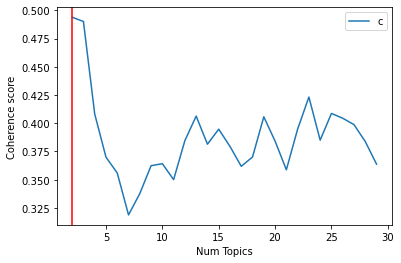

In [56]:
## Plot the change in coherence score with num_topics
import matplotlib.pyplot as plt
%matplotlib inline

start1=2
limit1=30
step1=1
# Show graph
x = range(start1, limit1, step1)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.axvline(x=Optimal_numTopics, color='r')
plt.show()

In [57]:
len(model_list)

28

#### Interpreting optimal topics

We have built the LDA model with 2 different topics in which multiple keywords contribute to a certain weightage(importance) for that topic

In [58]:
# seems optimal num_topics is 2
optimal_model = model_list[Optimal_numTopics]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=28))

[(0,
  '0.031*"bosch" + 0.030*"replac" + 0.028*"origin" + 0.023*"old" + '
  '0.022*"year" + 0.021*"return" + 0.021*"new" + 0.020*"item" + 0.016*"servic" '
  '+ 0.016*"manufactur" + 0.013*"check" + 0.012*"honda" + 0.012*"sell" + '
  '0.011*"month" + 0.011*"road" + 0.011*"break" + 0.009*"job" + 0.009*"ship" + '
  '0.009*"date" + 0.009*"expect" + 0.008*"scratch" + 0.008*"amaz" + '
  '0.007*"almost" + 0.007*"center" + 0.007*"till" + 0.007*"seal" + 0.007*"may" '
  '+ 0.007*"disappoint"'),
 (1,
  '0.049*"blade" + 0.039*"fit" + 0.034*"well" + 0.022*"glass" + '
  '0.020*"perfect" + 0.019*"water" + 0.018*"qualiti" + 0.015*"like" + '
  '0.013*"also" + 0.012*"one" + 0.012*"r" + 0.011*"side" + 0.010*"size" + '
  '0.010*"small" + 0.009*"cheap" + 0.009*"type" + 0.009*"purchas" + '
  '0.008*"poor" + 0.008*"last" + 0.008*"hyundai" + 0.008*"low" + 0.007*"fine" '
  '+ 0.007*"mention" + 0.007*"sure" + 0.007*"recommend" + 0.007*"find" + '
  '0.007*"bottl" + 0.006*"damag"'),
 (2,
  '0.074*"good" + 0.028*"i

#### Step7: Exploring topics obtained from optimal model

We are identifying the dominant topic and then mapping it back with the main document

In [59]:
# Get main topic in each document
gamma_df = build_gamma_df(lda_model=optimal_model, corpus0=corpus0)
#gamma_df.iloc[:8,:8]

row0 = gamma_df.values.tolist()
row=[]
for i in range(len(row0)):
    row1 = list(enumerate(row0[i]))
    row1_y = [y for (x,y) in row1]
    max_propn = sorted(row1_y, reverse=True)[0]
    row2 = [(i, x, y) for (x, y) in row1 if y==max_propn]
    row.append(row2)

row[0:7]

[[(0, 1, 0.6150159239768982)],
 [(1, 2, 0.5967032313346863)],
 [(2, 2, 0.5355520248413086)],
 [(3, 1, 0.5583778619766235)],
 [(4, 2, 0.690143346786499)],
 [(5, 3, 0.335114985704422)],
 [(6, 2, 0.6095709204673767)]]

In [60]:
sent_topics_df = pd.DataFrame()
for row1 in row:
    for (doc_num, topic_num, prop_topic) in row1:
        wp = optimal_model.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        sent_topics_df = sent_topics_df.append(pd.Series([int(doc_num), int(topic_num), 
                                                          round(prop_topic,4), 
                                                          topic_keywords]), 
                                                       ignore_index=True)
    
sent_topics_df.columns = ['Doc_num', 'Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']    
sent_topics_df.iloc[:8, :]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23924\2746256479.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(doc_num), int(topic_num),
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23924\2746256479.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(doc_num), int(topic_num),


,Doc_num,Dominant_Topic,Perc_Contribution,Topic_Keywords
0,0,1,0.6150,"blade, fit, well, glass, perfect, water, quali..."
1,1,2,0.5967,"good, instal, use, qualiti, one, easi, money, ..."
2,2,2,0.5356,"good, instal, use, qualiti, one, easi, money, ..."
3,3,1,0.5584,"blade, fit, well, glass, perfect, water, quali..."
4,4,2,0.6901,"good, instal, use, qualiti, one, easi, money, ..."
5,5,3,0.3351,"use, clean, wipe, nois, much, seller, issu, le..."
6,6,2,0.6096,"good, instal, use, qualiti, one, easi, money, ..."
7,7,1,0.3727,"blade, fit, well, glass, perfect, water, quali..."


In [61]:
# Add original text to the end of the output
contents = pd.Series(corpus0)
sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
#return(sent_topics_df)
sent_topics_df.columns = ['Doc_num', 'Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'contents']
pd.set_option('display.max_colwidth',500)
sent_topics_df.iloc[:50,:]

,Doc_num,Dominant_Topic,Perc_Contribution,Topic_Keywords,contents
0,0,1,0.6150,"blade, fit, well, glass, perfect, water, qualiti, like, also, one",perfect beauti 2nd purchas must tri lover
1,1,2,0.5967,"good, instal, use, qualiti, one, easi, money, rubber, make, price",let someon decal sticker pay thousand buck see magic far accur describ pictur word justic see pictur bmw f10 530d sport edit
2,2,2,0.5356,"good, instal, use, qualiti, one, easi, money, rubber, make, price",purchas open market qualiti design look super instal make easi look total upgrad
3,3,1,0.5584,"blade, fit, well, glass, perfect, water, qualiti, like, also, one",perfect fit nissan magnit look like near orgin design wheel pack
4,4,2,0.6901,"good, instal, use, qualiti, one, easi, money, rubber, make, price",colour combin show photo wheel cover receiv silver colour part colour black black colour silver caus whole design wheel cover chang think happen mistak manufactur pay attent colour
5,5,3,0.3351,"use, clean, wipe, nois, much, seller, issu, leav, great, last",excel
6,6,2,0.6096,"good, instal, use, qualiti, one, easi, money, rubber, make, price",best qualiti productsvalu money
7,7,1,0.3727,"blade, fit, well, glass, perfect, water, qualiti, like, also, one",qualiti perfect
8,8,1,0.3127,"blade, fit, well, glass, perfect, water, qualiti, like, also, one",good option loo fit magnit
9,9,2,0.4193,"good, instal, use, qualiti, one, easi, money, rubber, make, price",fit proper


In [62]:
test = sent_topics_df['Dominant_Topic'].value_counts()
test

2    1435
1     471
3     400
0     191
Name: Dominant_Topic, dtype: int64

#### Conclusion of Gensim Topic Model

We have identified 2 dominant topics with following interpretation

#### Topic Descriptors sorted by size or count of reviews
- 0 product,good,quality,use,buy (related positivity of product)
- 3 tyre (related tyre product)
- 2 wiper (related wiper postivity of product)
- 1 windshield (related windshield product)

In [68]:
dtm_idf.head()

,bad,best,blade,bosch,brand,bright,buy,chang,cheap,check,...,tyre,use,valu,wast,water,wipe,wiper,work,worth,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.367424,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
data_subset.iloc[:,-2]

0       1
1       2
2       2
3       1
4       2
       ..
2492    2
2493    1
2494    2
2495    1
2496    1
Name: Dominant_Topic, Length: 2497, dtype: int32

#### Step 3: Training the model

Firstly, we need to split the data into test and train

In [70]:
#Training the model
X_train, X_test, y_train, y_test = train_test_split(dtm,data_subset.iloc[:,-2])
X_train_idf, X_test_idf, y_train_idf, y_test_idf = train_test_split(dtm_idf,data_subset.iloc[:,-2])

## Naive Bayes Model Heat Map and Interpretation

1. Naive Bayes Model and TF-IDF Matrix have almost all same Accuracy
2. Product is getting confused with Tyre, Wiper

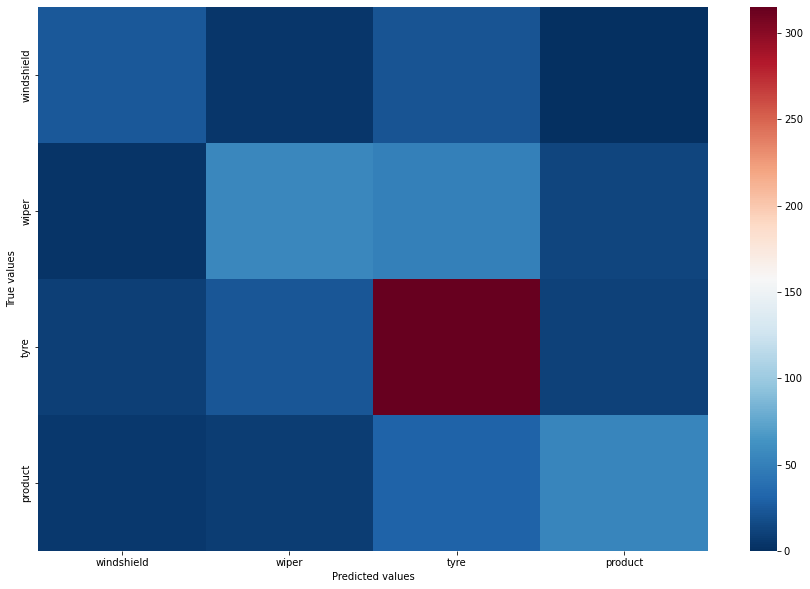

In [73]:
# Compute the confusion matrix and display it as a heatmap.
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10))

# neat heat map
sns.heatmap(conf_mat , cmap="RdBu_r", xticklabels = categories, yticklabels = categories)
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.show()

CPU times: total: 219 ms
Wall time: 212 ms
Accuracy on TF is : 0.6032
CPU times: total: 219 ms
Wall time: 222 ms
Accuracy on TF-IDF is : 0.6096


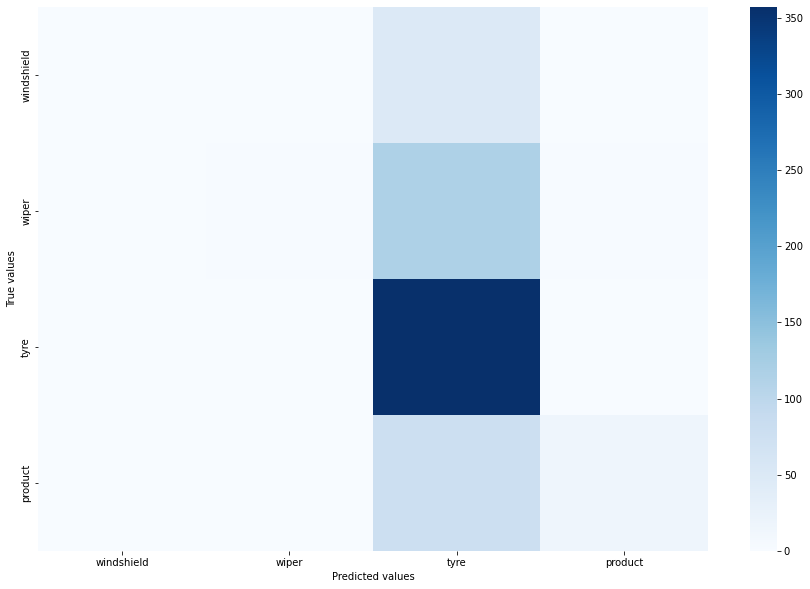

In [74]:
#Random Forest Classifier
# Train the classifier on training data set
clf = clf = RandomForestClassifier(n_estimators=50, max_depth=5,random_state=0)
%time clf.fit(X_train,y_train)

# Prediction accuracy on test dataset
y_pred = clf.predict(X_test)
print("Accuracy on TF is : " + str(clf.score(X_test,y_test)))

# Train and test the classifier on idf data set
%time clf.fit(X_train_idf,y_train_idf)
y_pref_idf = clf.predict(X_test_idf)
print("Accuracy on TF-IDF is : " + str(clf.score(X_test_idf,y_test_idf)))

# Compute the confusion matrix and display it as a heatmap.
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat , cmap="Blues", xticklabels = categories, yticklabels = categories)
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.show()